## Importing libraries used for this project

In [1]:
pip install contractions 

In [2]:
pip install emoji --upgrade

In [3]:
import numpy as np
import pandas as pd
from google.colab import drive 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re #regex package
import contractions

## Importing our Review file in csv format. Studying its content

In [4]:
#moungting to Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#reading DataFrame under csv format
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Sequence/reviews.csv')

df.shape

(12495, 12)

In [6]:
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
4666,gp:AOqpTOHKr37K5JHJ8tCIFhg7Aqb7ncmAncAd2FWtkAK...,Sarah Yaker,https://play-lh.googleusercontent.com/a-/AOh14...,It's nice to have an app that keeps me off my ...,5,0,NaN,2020-10-24 03:39:29,NaN,NaN,newest,cc.forestapp
5230,gp:AOqpTOGduKuZ5UsJZq9ztERlmksao1DW6KkFLNBMTub...,Jorge Jedidiah Preble,https://play-lh.googleusercontent.com/a-/AOh14...,Navigation needs work: you can only navigate w...,3,0,1.5.11,2020-01-30 05:18:08,NaN,NaN,newest,com.oristats.habitbull
3898,gp:AOqpTOGfOwIzchWDV7jspiLA56d675RzzcOt7eyzZ4I...,Hasti A,https://play-lh.googleusercontent.com/-0Iq7J4a...,It doesn't work for me. It always get out of t...,1,0,NaN,2020-10-10 00:15:56,"Hi, please update the app to the latest versio...",2020-10-11 20:24:23,newest,cc.forestapp
7390,gp:AOqpTOF-9ylQzL0DQypp_AT3VRtZ5Hxb5ewIvwHcTj6...,Poly Pay,https://play-lh.googleusercontent.com/-oSC8zW_...,Simple to use and works great so far! Just wis...,4,0,2.28.169,2020-10-21 21:33:50,NaN,NaN,newest,com.microsoft.todos
1915,gp:AOqpTOEqg5yNK0ckikUcZngddbX5-MkgN-SvvHyPx5P...,David Ešner,https://play-lh.googleusercontent.com/a-/AOh14...,Often freezing and crashing when I wanna add p...,1,1,5.8.3,2020-10-03 15:16:44,NaN,NaN,newest,com.ticktick.task
6527,gp:AOqpTOGASwfU916Z7ABvAu2ZexfFEWp_26-hn-S1izs...,Manjari Debnath,https://play-lh.googleusercontent.com/a-/AOh14...,This is a very good app... just if the shoppin...,4,0,1.2.3,2020-04-19 00:52:36,NaN,NaN,newest,com.habitnow
4106,gp:AOqpTOHSv-HNnnAS3JoLTr--L9GhyPm7MOKwPSatrQF...,Fátima Condey,https://play-lh.googleusercontent.com/a-/AOh14...,What motivated me to keep using the app was co...,2,11,4.22.0,2020-09-08 12:33:28,"Hello, we have made changes to the relevant me...",2020-09-08 16:02:42,newest,cc.forestapp
8436,gp:AOqpTOHFBxO_rWNUoIUWUroqIWyuhkhLvFt3MG3poQH...,Shaukat Ali,https://play-lh.googleusercontent.com/a-/AOh14...,Beautiful,4,0,5.13.2,2019-12-19 15:30:28,NaN,NaN,newest,prox.lab.calclock
4130,gp:AOqpTOF6m19_4zNtZaMxAmLXl_Hzi0wFJbQIMGsbQDa...,Tundra Dragon,https://play-lh.googleusercontent.com/a-/AOh14...,"I was super excited to use this app, as it was...",2,0,NaN,2020-08-27 22:18:58,"Hi,\nSorry for the inconvenience. As independe...",2020-08-30 17:27:23,newest,cc.forestapp
9557,gp:AOqpTOExfP6ukhYx5ha807aMsFzRWSYAr4JV4Yw0Jz1...,Radhika Chaudhary,https://play-lh.googleusercontent.com/-JAFX747...,Nice application for students also,5,0,3.0,2020-08-26 11:01:38,NaN,NaN,newest,com.gmail.jmartindev.timetune


In [7]:
#printing number of reviews
print('Total number of Google App Review: {}'.format(len(df)))

Total number of Google App Review: 12495


In [8]:
#checking a review at a certain order number
review_number = 4300
review = df.iloc[review_number]
print ('Review: {}'.format(review['content']))
print('Tweet score: {}'.format(review['score']))

Review: App molto comoda e semplice. Peccato che dopo l'ultimo aggiornamento gli acquisti possibili senza la versione pro sono diventati veramente pochi, rendendo l'uso dell'app poco stimolante.
Tweet score: 3


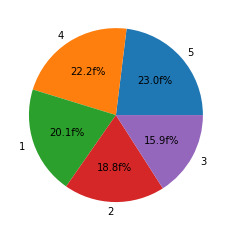

In [9]:
#visualisation of the % of score for each score type
score_representation = df['score'].value_counts()
plt.pie(score_representation, labels = score_representation.index, autopct = '%1.1ff%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'score')

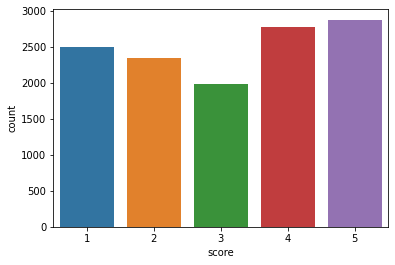

In [10]:
#representation in numbers of each score type using histagram
sns.countplot(df.score)
plt.xlabel('score')

In [11]:
df.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64

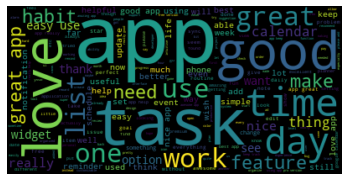

In [12]:
# visualisation of most common words with the positive review, with score higher or equal to 4
high_score = df[df['score']>=4]
text = ' '.join(score.lower() for score in high_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

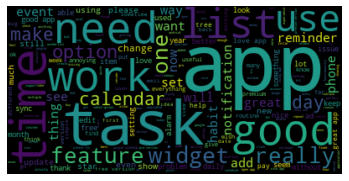

In [13]:
# visualisation of most common words with the neutral review, with score equal to 3
neutral_score = df[df['score']==3]
text = ' '.join(score.lower() for score in neutral_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

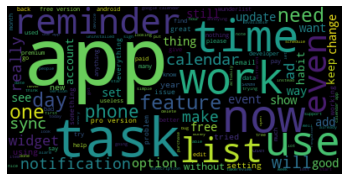

In [14]:
# visualisation of most common words with the negative review, with score equal or lower than 2
negative_score = df[df['score']<=2]
text = ' '.join(score.lower() for score in negative_score['content'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Text normalisation to reduce randomness in the text.
We will be removing or replacing items do not add any informational vlaue


https://regexr.com/

In [15]:
#instaling emojis in order for our review text normalization

In [16]:
# replace a character with space
def replace_content(content, replace_content=''):
  content = re.sub('', replace_content, content) #creates substring of the string
  return content

In [17]:
# transform from emoji to a string
def demojize_content(content):
  content = emoji.demojize(content)
  return content

In [18]:
# replace a character with space
def replace_content(content, replace_content=''):
  content = re.sub('', replace_content, content) #creates substring of the string
  return content

In [19]:
# remove hashtag
def remove_hashtag(content, replace_hastage=''):
  content = re.sub('#+', replace_hastage, content) #creates substring of the string
  return content

## Text cleaning


In [20]:
#removing capitalization
def to_lowercase(content):
  content = content.lower()
  return content

In [21]:
#removing letter repetition
def repetition_removed (content):
  content = re.sub(r'(.)\1+', r'\1\1', content)
  return content

In [22]:
#removing punctuation repetition
def repetition_punctuation (content, replace_content =''):
  content = re.sub(r'[\?\.\!]+(?=[\?\.\!])',replace_content, content)
  return content

In [23]:
#working word contractions

In [24]:
def remove_contractions (content):
  for k, v in contractions.contractions_dict.items():
    content = content.replace(k,v)

## Tokenization 